In [296]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [297]:
# Reading data from csv file
ds = pd.read_csv('Space.csv')
ds

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [298]:
# dropping the null values 
ds.dropna(inplace=True)

In [299]:
ds.shape

(10000, 18)

In [300]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (10000, 18)
Shape of dataset after removing duplicates:  (10000, 18)


In [301]:
# Reading the head of the data
ds.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [302]:
# Checking the columns of the dataset
ds.shape

(10000, 18)

In [303]:
ds.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [304]:
ds.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [305]:
# Checking the dataset columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


# Summarize the 'class' distribution

In [306]:
from collections import Counter

target = ds.values[:,-5]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Class = %s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Class = STAR, Count=4152, Percentage=41.520%
Class = GALAXY, Count=4998, Percentage=49.980%
Class = QSO, Count=850, Percentage=8.500%


In [307]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid'], dtype='object')

In [308]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['class'], dtype='object')

# Checking the unique values of columns of dataset

In [309]:
ds['ra'].unique()

array([183.5313257, 183.5983705, 183.6802074, ..., 131.5525623,
       131.4771511, 131.6650121])

In [310]:
ds['dec'].unique()

array([ 0.08969303,  0.13528503,  0.12618509, ..., 51.66698638,
       51.75306779, 51.80530747])

In [311]:
ds['u'].unique()

array([19.47406, 18.6628 , 19.38298, ..., 18.75818, 18.88287, 19.27586])

In [312]:
ds['g'].unique()

array([17.0424 , 17.21449, 18.19169, ..., 17.77784, 17.91068, 17.37829])

In [313]:
ds['r'].unique()

array([15.94699, 16.67637, 17.47428, ..., 17.51872, 17.53152, 16.30542])

In [314]:
ds['i'].unique()

array([15.50342, 16.48922, 17.08732, ..., 17.43302, 17.36284, 15.83548])

In [315]:
ds['z'].unique()

array([15.22531, 16.3915 , 16.80125, ..., 17.42048, 17.13988, 15.50588])

In [316]:
ds['run'].unique()

array([ 752,  756,  308,  727,  745, 1035, 1045, 1140, 1231, 1332, 1334,
       1302, 1239, 1119, 1331, 1345, 1350, 1404, 1412, 1336, 1402, 1411,
       1356], dtype=int64)

In [317]:
ds['rerun'].unique()

array([301], dtype=int64)

In [318]:
ds['camcol'].unique()

array([4, 2, 1, 5, 6, 3], dtype=int64)

In [319]:
ds['specobjid'].unique()

array([3.72236e+18, 3.63814e+17, 3.23274e+17, ..., 5.03345e+17,
       5.03340e+17, 5.03341e+17])

In [320]:
ds['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [321]:
ds['redshift'].unique()

array([-8.960000e-06, -5.490000e-05,  1.231112e-01, ..., -4.015730e-04,
        1.401894e-02,  1.184173e-01])

# Checking the count of 'Class' based on columns

In [322]:
ds.groupby(['camcol'])['class'].count()

camcol
1    1298
2    1712
3    1560
4    1834
5    1827
6    1769
Name: class, dtype: int64

# Statistical Summary

In [323]:
ds.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [324]:
ds.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [325]:
ds.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

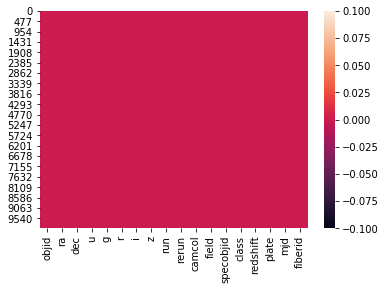

In [326]:
sns.heatmap(ds.isnull())

# Checking the corelation

In [327]:
ds.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
ds.drop(columns=['rerun', 'specobjid'], inplace=True)

In [329]:
ds.corr()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,1.921887e-15,5.938881e-16,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,-6.293831e-03,5.946996e-01,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,1.146139e-01,-1.314714e-01,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,9.944672e-03,8.547880e-03,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,1.022304e-02,1.465110e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,1.074725e-02,1.713294e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,1.346079e-02,1.978147e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,1.092981e-02,1.824845e-02,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,1.518143e-01,-4.638975e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
camcol,1.921887e-15,-6.293831e-03,1.146139e-01,9.944672e-03,1.022304e-02,1.074725e-02,1.346079e-02,1.092981e-02,1.518143e-01,1.000000e+00,-6.792055e-02,6.833537e-03,4.079461e-02,2.628396e-02,5.356292e-01


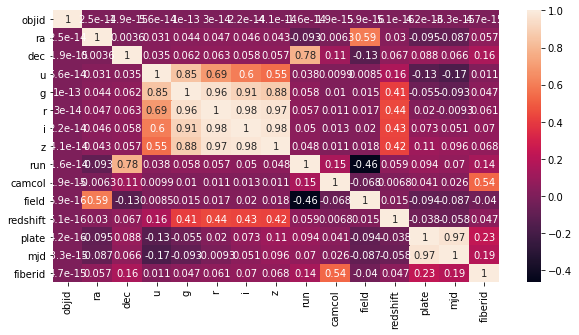

In [330]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.corr(), annot=True)

# Countplots for features

Univariate Analysis

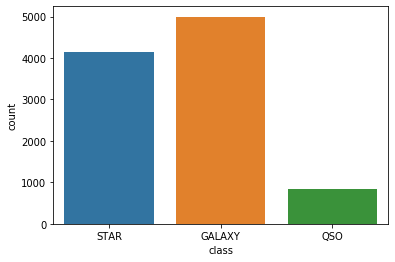

In [331]:
sns.countplot(ds['class'])

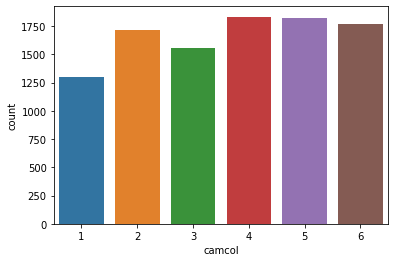

In [332]:
sns.countplot(ds['camcol'])

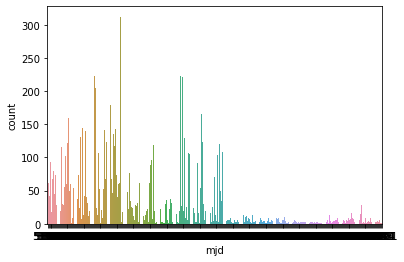

In [333]:
sns.countplot(ds['mjd'])

Using LabelEncoder to change categorical data 'class' to numbers

In [334]:
le = LabelEncoder()
ds['class'] = le.fit_transform(ds['class'])

In [335]:
ds.dtypes

objid       float64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
class         int32
redshift    float64
plate         int64
mjd           int64
fiberid       int64
dtype: object

# Plotting Outliers

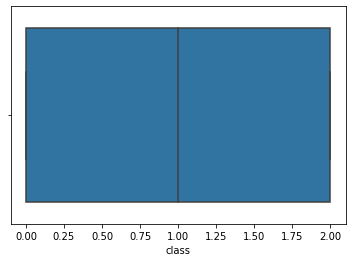

In [336]:
sns.boxplot(ds['class'])

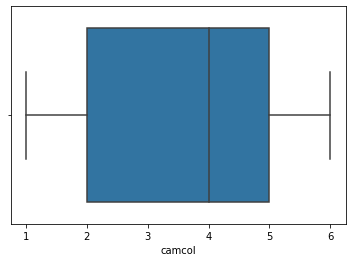

In [337]:
sns.boxplot(ds['camcol'])

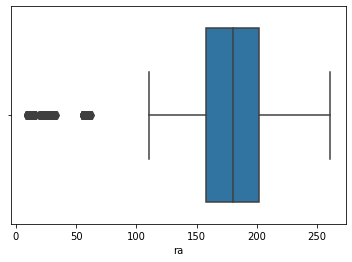

In [338]:
sns.boxplot(ds['ra'])

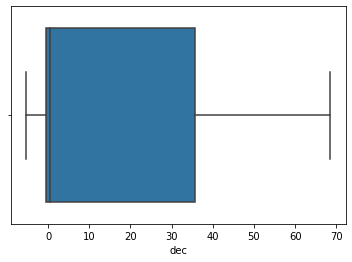

In [339]:
sns.boxplot(ds['dec'])

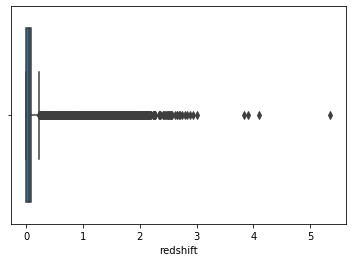

In [340]:
sns.boxplot(ds['redshift'])

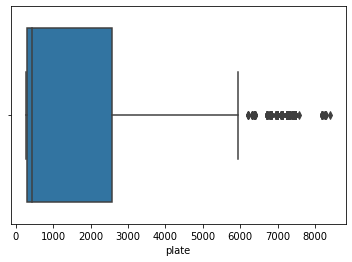

In [341]:
sns.boxplot(ds['plate'])

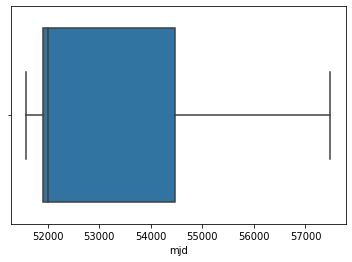

In [342]:
sns.boxplot(ds['mjd'])

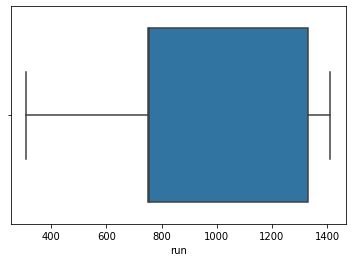

In [343]:
sns.boxplot(ds['run'])

In [344]:
collist = ds.columns.values
collist

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol',
       'field', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype=object)

In [345]:
ncols = 10
nrows = 10

# Distribution plots to check the skewness of data

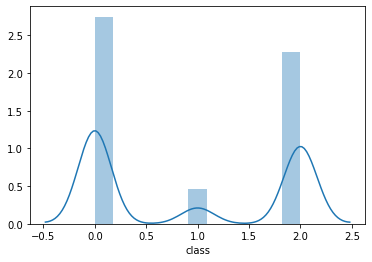

In [346]:
sns.distplot(ds['class'])

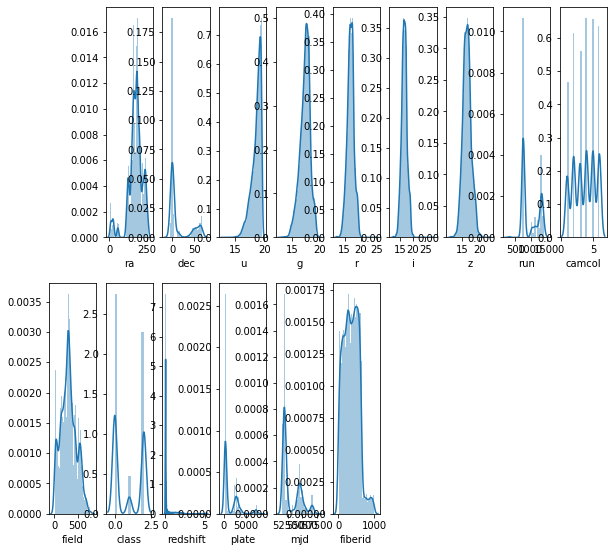

In [347]:
plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(ds[collist[i]])
    #plt.tight_layout()

From the above plot, it seems data is not normally distributed.
only g,r,i,z columns data is normally distributed.

# Violinplot

violinplot: is a method to visualize the distribution of numerical data of different variables.


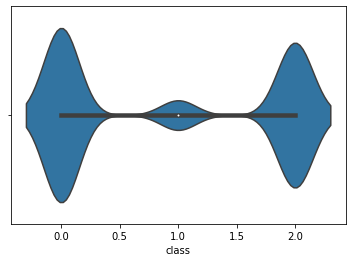

In [348]:
sns.violinplot(ds['class'])

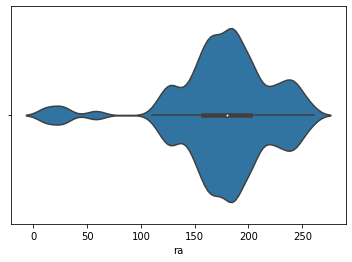

In [349]:
sns.violinplot(ds['ra'])

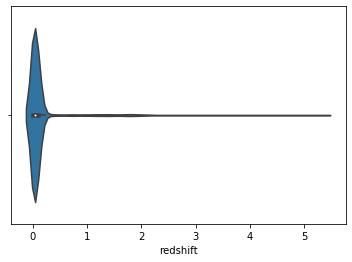

In [350]:
sns.violinplot(ds['redshift'])

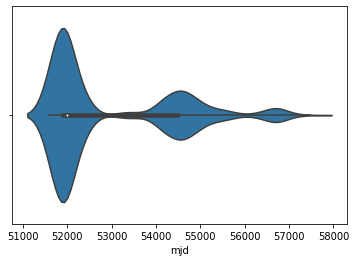

In [351]:
sns.violinplot(ds['mjd'])

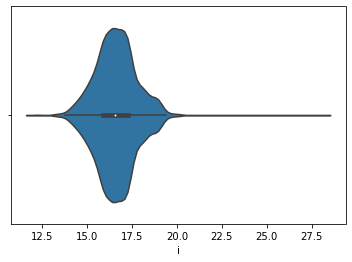

In [352]:
sns.violinplot(ds['i'])

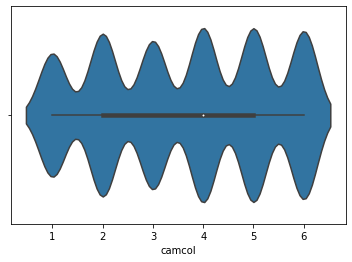

In [353]:
sns.violinplot(ds['camcol'])

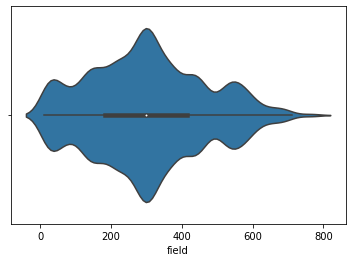

In [354]:
sns.violinplot(ds['field'])

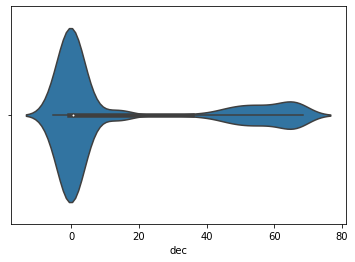

In [355]:
sns.violinplot(ds['dec'])

# Histograms

Histogram is a plot that lets you doscover, and show, the underlying frequency distribution(shape) of a set of
continues data

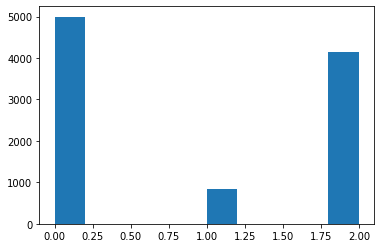

In [356]:
plt.hist(ds['class'])
plt.show()

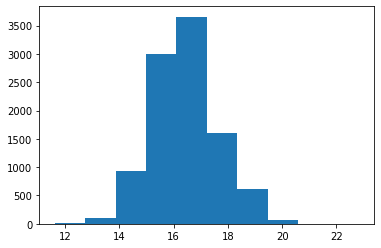

In [357]:
plt.hist(ds['z'])
plt.show()

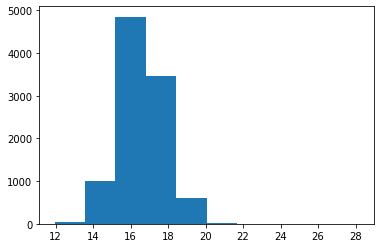

In [358]:
plt.hist(ds['i'])
plt.show()

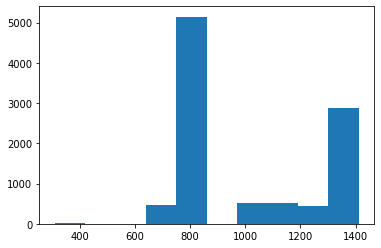

In [359]:
plt.hist(ds['run'])
plt.show()

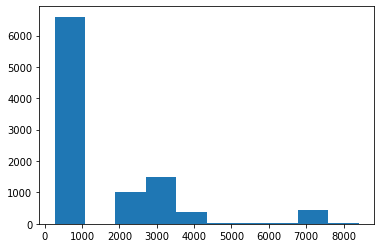

In [360]:
plt.hist(ds['plate'])
plt.show()

# Bivariate Analysis 

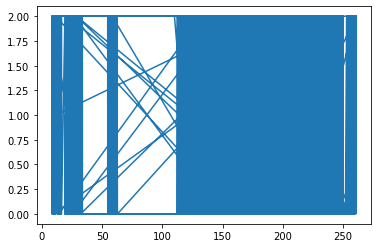

In [361]:
plt.plot(ds['ra'], ds['class'], label='linear')
plt.show()

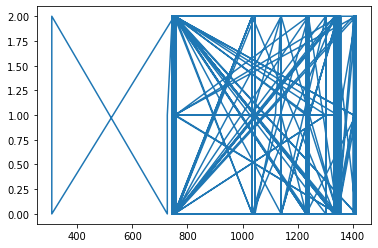

In [362]:
plt.plot(ds['run'], ds['class'])
plt.show()

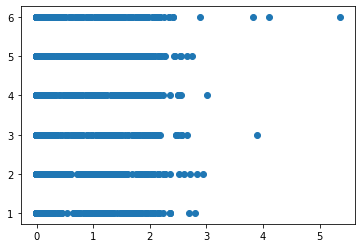

In [363]:
plt.scatter(x=ds['redshift'], y=ds['camcol'])
plt.show()

# Swarmplot

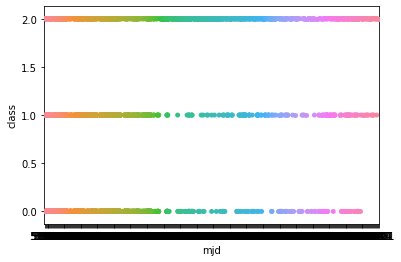

In [364]:
sns.swarmplot(x='mjd', y='class', data=ds)
plt.show()

In [365]:
# Checking the skewness of the data
ds.skew()

objid       1.000150
ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [366]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore

for i in ds.columns:
    ds_copy = ds.drop(i, axis=1 )
    z = np.abs(zscore(ds_copy))
    ds_new = ds_copy [(z<3).all(axis=1)]
    print (ds_new.shape, i)

(8698, 15) objid
(0, 15) ra
(0, 15) dec
(0, 15) u
(0, 15) g
(0, 15) r
(0, 15) i
(0, 15) z
(0, 15) run
(0, 15) camcol
(0, 15) field
(0, 15) class
(0, 15) redshift
(0, 15) plate
(0, 15) mjd
(0, 15) fiberid


In [367]:
ds.drop(columns=['objid'], inplace=True)

In [368]:
ds.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'class',
       'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [369]:
# Commented

# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (10000, 15)
After removing zscore:  (8698, 15)


In [370]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['class'])
y = ds_final['class']

In [371]:
y.unique()

array([2, 0, 1])

In [372]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [373]:
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,0.022563,-0.563207,1.076410,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,-0.458367,1.637571,1.667376,0.754994
1,0.024421,-0.561415,0.039766,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,-0.458639,-0.659347,-0.883708,1.016814
2,0.026689,-0.561772,0.960026,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,0.270060,-0.687067,-0.568969,0.870195
3,0.031964,-0.564770,-1.107002,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,-0.458969,1.637571,1.667376,0.854486
4,0.032318,-0.562701,-1.381874,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,-0.454822,1.637571,1.667376,0.864958


In [374]:
(x.shape, y.shape)

((8698, 14), (8698,))

In [375]:
x.skew()

ra         -0.130951
dec         1.212911
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
run         0.518602
camcol     -0.141193
field       0.220032
redshift    4.951700
plate       1.320088
mjd         0.963989
fiberid     0.065374
dtype: float64

In [376]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [377]:
x.skew()

ra         -0.130951
dec        -1.131476
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
run         0.518602
camcol     -0.141193
field       0.220032
redshift    2.196229
plate       1.743700
mjd         0.059860
fiberid     0.065374
dtype: float64

In [378]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [379]:
x.skew()

ra         -0.130951
dec        -1.131476
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
run         0.518602
camcol     -0.141193
field       0.220032
redshift    1.431023
plate       1.256741
mjd         0.059860
fiberid     0.065374
dtype: float64

In [380]:
# Remove skewness 
for col in x.columns:
    if x.skew().loc[col] > 0.55:
        x[col] = np.sqrt(x[col])

In [381]:
x.skew()

ra         -0.130951
dec        -1.131476
u          -0.981103
g          -0.528033
r          -0.153454
i           0.055966
z           0.167256
run         0.518602
camcol     -0.141193
field       0.220032
redshift    0.857918
plate       1.020113
mjd         0.059860
fiberid     0.065374
dtype: float64

In [382]:
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,0.022563,NaN,1.076410,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,NaN,1.063592,1.291269,0.754994
1,0.024421,NaN,0.039766,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,NaN,NaN,NaN,1.016814
2,0.026689,NaN,0.960026,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,0.849049,NaN,NaN,0.870195
3,0.031964,NaN,-1.107002,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,NaN,1.063592,1.291269,0.854486
4,0.032318,NaN,-1.381874,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,NaN,1.063592,1.291269,0.864958


In [383]:
x.replace(np.NaN, 0, inplace=True)

In [384]:
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,0.022563,0.0,1.076410,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,0.000000,1.063592,1.291269,0.754994
1,0.024421,0.0,0.039766,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,0.000000,0.000000,0.000000,1.016814
2,0.026689,0.0,0.960026,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,0.849049,0.000000,0.000000,0.870195
3,0.031964,0.0,-1.107002,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,0.000000,1.063592,1.291269,0.854486
4,0.032318,0.0,-1.381874,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,0.000000,1.063592,1.291269,0.864958


# Classification algorithm for dataset: with target column 'class'

In [385]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [386]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [387]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [388]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  58  is:  0.9063218390804598
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [2 2 2 ... 0 0 0]


Accuracy score:  0.9063218390804598


cross val score:  0.8825055884025768


[0.         0.40361446 0.4060241  1.        ] [0.     0.075  0.8625 1.    ] [3 2 1 0]
roc auc score:  0.5694051204819277


classification report:                precision    recall  f1-score   support

           0       0.90      0.94      0.92       963
           1       0.94      0.79      0.86        80
           2       0.91      0.88      0.89       697

    accuracy                           0.91      1740
   macro avg       0.92      0.87      0.89      1740
weighted avg       0.91      0.91      0.91      1740



[[902   3  58]
 [ 11  63   6]
 [ 84  

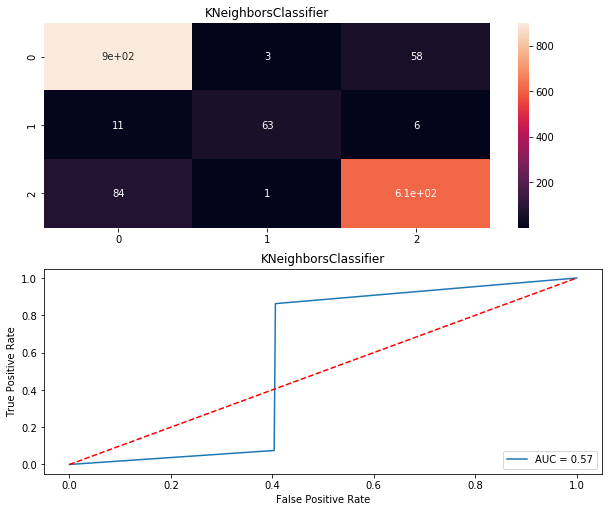

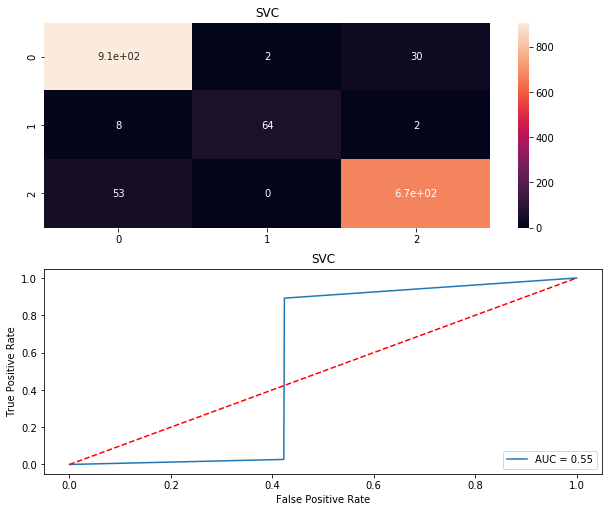

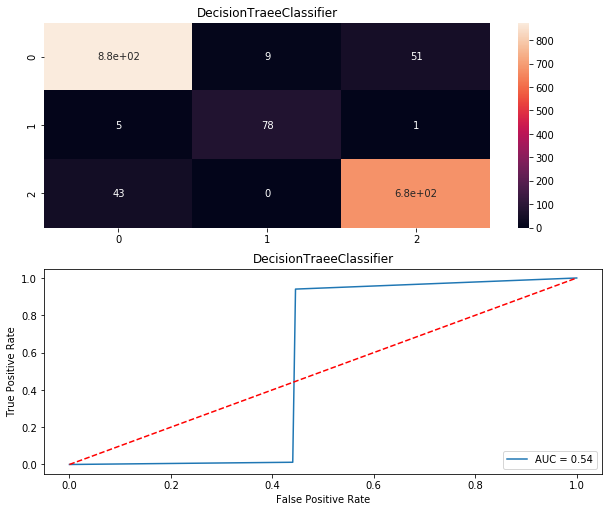

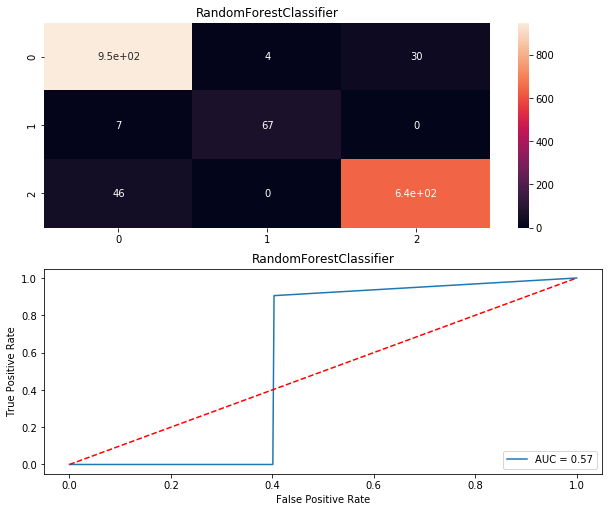

In [389]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [390]:
# Displaying teh data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,90.632184,88.250559,56.940512,58
1,SVC,94.540230,93.412603,55.134486,59
2,DecisionTraeeClassifier,93.735632,92.343359,54.305771,86
3,RandomForestClassifier,95.000000,93.665542,56.950618,74


In [391]:
#Using the best model for gridsearchcv

parameters = { 'n_estimators' : [50, 100, 150, 200, 250, 300], 'max_features' : ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy']}

gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=10)

In [392]:
gsc

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [393]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=74, test_size = 0.20)
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=None, criterion='gini' )
rfc.fit(x_train, y_train)
y_pred =  rfc.predict(x_test)
print (y_pred)

[0 0 0 ... 0 0 0]


The data consists of 10000 observations of space taken by the SDSS. Every observation is described by 17 features 
columns and 1 class column which identifies it to be either a star, galaxy or quasar

In [394]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_space.csv')

accuracy score:  0.9488505747126437
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       950
           1       0.90      0.89      0.90        74
           2       0.96      0.94      0.95       716

    accuracy                           0.95      1740
   macro avg       0.94      0.93      0.93      1740
weighted avg       0.95      0.95      0.95      1740

Confusion_matrix:  [[912   7  31]
 [  8  66   0]
 [ 43   0 673]]
cross val score:  0.9373448143592187
roc auc score:  0.5441176470588235
AxesSubplot(0.125,0.808774;0.62x0.0712264)





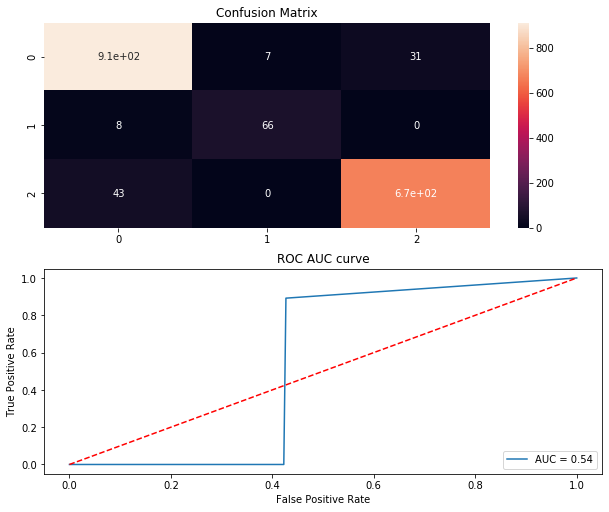

In [395]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(rfc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [396]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(rfc, 'project_space.pkl')
#clf = joblib.load('project_space.pkl')
#clf.predict(x_test)

['project_space.pkl']

In [397]:
x(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'

SyntaxError: unexpected EOF while parsing (<ipython-input-397-414e9e800290>, line 2)